In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [13]:
print train_data.shape
print train_data[0]
print train_labels[0]
print max([max(sequence) for sequence in train_data])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 3s 2us/step


In [5]:
print decoded_review

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [22]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
print x_train.shape
print x_train

(25000, 10000)
[[ 0.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]]


In [24]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.3006 - acc: 0.9053 - val_loss: 0.3004 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2180 - acc: 0.9284 - val_loss: 0.3082 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2839 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2847 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1149 - acc: 0.9654 - val_loss: 0.3149 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0978 - acc: 0.9705 - val_loss: 0.3130 - 

In [32]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

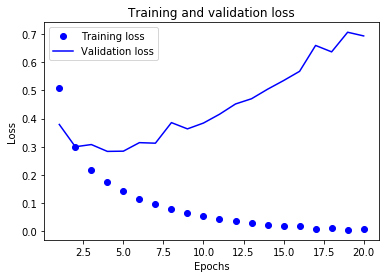

In [38]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

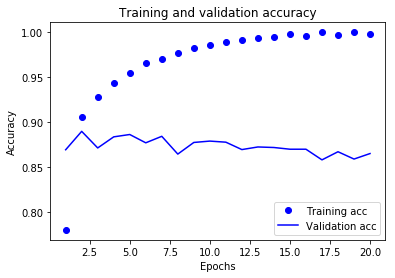

In [39]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print results

Epoch 1/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.1498 - acc: 0.8142
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.0790 - acc: 0.9100
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.0592 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 96us/step
[0.086684307196140287, 0.88280000000000003]


In [42]:
model.predict(x_test)

array([[ 0.15684398],
       [ 0.99982965],
       [ 0.40445155],
       ..., 
       [ 0.08264954],
       [ 0.05061212],
       [ 0.4683243 ]], dtype=float32)

### Experimentation

In [116]:
def create_neural_net(hidden_layers=[16, 16], loss='binary_crossentropy', activation='relu'):
    m = models.Sequential()
    
    m.add(layers.Dense(hidden_layers[0], activation=activation, input_shape=(10000,)))
    for node_count in hidden_layers[1:]:
        m.add(layers.Dense(node_count, activation=activation))
    m.add(layers.Dense(1, activation='sigmoid'))
    m.compile(optimizer='rmsprop',
             loss=loss,
             metrics=['accuracy'])
    return m

def train_model(m, epochs=20):
    h = m.fit(partial_x_train,
                 partial_y_train,
                 epochs=epochs,
                 batch_size=512,
                 validation_data=(x_val, y_val))
    return h
    
def generate_charts(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)
    
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(epochs, loss_values, 'bo', label='Training loss')
    ax1.plot(epochs, val_loss_values, 'b', label='Validation loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    ax2.plot(epochs, acc_values, 'bo', label='Training acc')
    ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')

    plt.show()

In [79]:
two_layers_model = create_neural_net()
two_layers_history = train_model(two_layers_model)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.5222 - acc: 0.7935 - val_loss: 0.3927 - val_acc: 0.8593
Epoch 2/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.2991 - acc: 0.9041 - val_loss: 0.3121 - val_acc: 0.8775
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2169 - acc: 0.9301 - val_loss: 0.3319 - val_acc: 0.8660
Epoch 4/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.1700 - acc: 0.9453 - val_loss: 0.2746 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1384 - acc: 0.9552 - val_loss: 0.3344 - val_acc: 0.8710
Epoch 6/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1119 - acc: 0.9660 - val_loss: 0.2972 - val_acc: 0.8846
Epoch 7/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.0926 - acc: 0.9723 - val_loss: 0.3204 - 

In [110]:
three_layers_model = create_neural_net(hidden_layers=[16, 16, 16])
three_layers_history = train_model(three_layers_model)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 218us/step - loss: 0.5918 - acc: 0.7465 - val_loss: 0.4545 - val_acc: 0.8677
Epoch 2/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.3587 - acc: 0.8927 - val_loss: 0.3290 - val_acc: 0.8858
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2486 - acc: 0.9223 - val_loss: 0.2908 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1863 - acc: 0.9427 - val_loss: 0.2758 - val_acc: 0.8927
Epoch 5/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.1453 - acc: 0.9535 - val_loss: 0.2882 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1142 - acc: 0.9661 - val_loss: 0.3072 - val_acc: 0.8829
Epoch 7/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.0925 - acc: 0.9738 - val_loss: 0.3217 - 

In [112]:
thirty_two_model = create_neural_net(hidden_layers=[32, 32])
thirty_two_history = train_model(thirty_two_model)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 297us/step - loss: 0.4904 - acc: 0.7844 - val_loss: 0.3561 - val_acc: 0.8710
Epoch 2/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.2690 - acc: 0.9105 - val_loss: 0.3089 - val_acc: 0.8776
Epoch 3/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.2019 - acc: 0.9302 - val_loss: 0.3051 - val_acc: 0.8771
Epoch 4/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1564 - acc: 0.9477 - val_loss: 0.2947 - val_acc: 0.8829
Epoch 5/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1236 - acc: 0.9606 - val_loss: 0.2969 - val_acc: 0.8825
Epoch 6/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.0995 - acc: 0.9663 - val_loss: 0.3243 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 3s 199us/step - loss: 0.0787 - acc: 0.9752 - val_loss: 0.3381 - 

In [113]:
sixty_four_model = create_neural_net(hidden_layers=[64, 64])
sixty_four_history = train_model(sixty_four_model)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.4883 - acc: 0.7697 - val_loss: 0.3161 - val_acc: 0.8847
Epoch 2/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.2586 - acc: 0.9032 - val_loss: 0.2884 - val_acc: 0.8825
Epoch 3/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.1911 - acc: 0.9273 - val_loss: 0.3540 - val_acc: 0.8598
Epoch 4/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.1348 - acc: 0.9513 - val_loss: 0.3032 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.1103 - acc: 0.9605 - val_loss: 0.4326 - val_acc: 0.8600
Epoch 6/20
15000/15000 [==============================] - 3s 215us/step - loss: 0.0727 - acc: 0.9762 - val_loss: 0.4233 - val_acc: 0.8609
Epoch 7/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.0745 - acc: 0.9742 - val_loss: 0.3802 - 

In [117]:
mse_model = create_neural_net(loss='mse')
mse_history = train_model(mse_model)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.1872 - acc: 0.7685 - val_loss: 0.1418 - val_acc: 0.8591
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1081 - acc: 0.9005 - val_loss: 0.1039 - val_acc: 0.8839
Epoch 3/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.0742 - acc: 0.9283 - val_loss: 0.0949 - val_acc: 0.8822
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.0571 - acc: 0.9435 - val_loss: 0.0851 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.0461 - acc: 0.9524 - val_loss: 0.0863 - val_acc: 0.8847
Epoch 6/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.0373 - acc: 0.9634 - val_loss: 0.0875 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.0309 - acc: 0.9713 - val_loss: 0.0856 - 

In [118]:
tanh_model = create_neural_net(activation='tanh')
tanh_history = train_model(tanh_model)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.4895 - acc: 0.7935 - val_loss: 0.3722 - val_acc: 0.8562
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2735 - acc: 0.9076 - val_loss: 0.2836 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1955 - acc: 0.9341 - val_loss: 0.2697 - val_acc: 0.8927
Epoch 4/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1462 - acc: 0.9509 - val_loss: 0.2952 - val_acc: 0.8812
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1141 - acc: 0.9619 - val_loss: 0.3043 - val_acc: 0.8840
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0872 - acc: 0.9711 - val_loss: 0.3747 - val_acc: 0.8692
Epoch 7/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.0691 - acc: 0.9784 - val_loss: 0.3872 - 

2 hidden layers


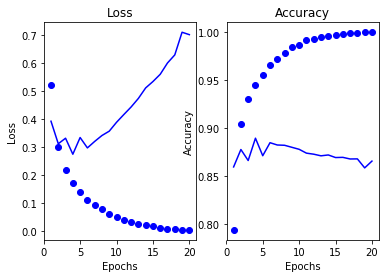

3 hidden layers


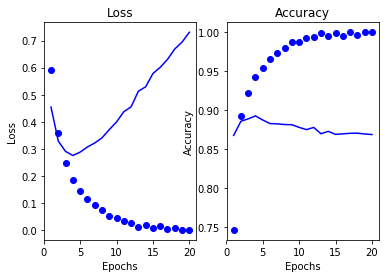

32 units


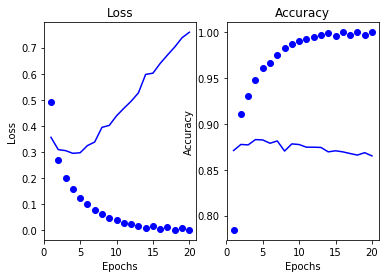

64 units


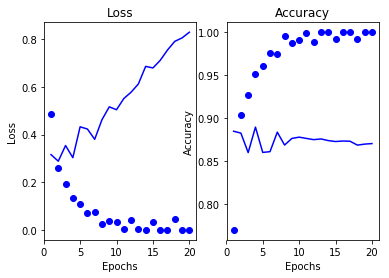

MSE loss


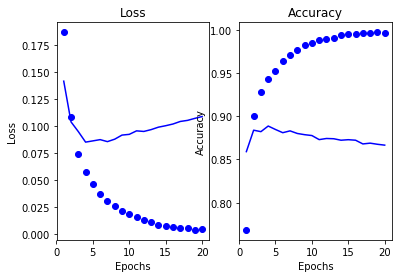

tanh activation


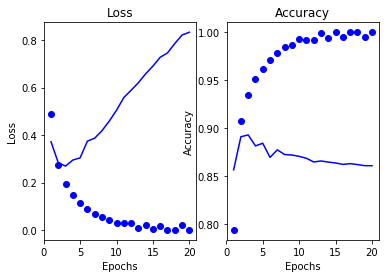

In [119]:
print "2 hidden layers"
generate_charts(two_layers_history.history)
print "3 hidden layers"
generate_charts(three_layers_history.history)
print "32 units"
generate_charts(thirty_two_history.history)
print "64 units"
generate_charts(sixty_four_history.history)
print "MSE loss"
generate_charts(mse_history.history)
print "tanh activation"
generate_charts(tanh_history.history)

In [120]:
def evaluate(m):
    results = m.evaluate(x_test, y_test)
    print results
    
evaluate(two_layers_model)
evaluate(three_layers_model)
evaluate(thirty_two_model)
evaluate(sixty_four_model)
evaluate(mse_model)
evaluate(tanh_model)

25000/25000 [==============================] - 3s 121us/step
[0.77680449512004857, 0.85075999999999996]
25000/25000 [==============================] - 3s 107us/step
[0.81555645062446591, 0.85340000000000005]
25000/25000 [==============================] - 3s 131us/step
[0.83907713793039318, 0.85152000000000005]
25000/25000 [==============================] - 5s 184us/step
[0.92070787186861036, 0.85455999999999999]
25000/25000 [==============================] - 3s 113us/step
[0.1191392409157753, 0.85372000000000003]
25000/25000 [==============================] - 3s 114us/step
[0.92966587378978727, 0.84419999999999995]
